In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('dataFinal.csv')

In [3]:
dfWithMPAA = df.copy()
dfNoMPAA = df.copy()
del dfNoMPAA['MPAA']

In [4]:
dfWithMPAA.dropna(inplace=True)
dfNoMPAA.dropna(inplace=True)

In [5]:
#for both dropping any rows with wrong month values
#may want to revisit this- might be month is useless tbh
months =['September', 'March', 'July', 'November', 'April', 'December',
       'October', 'May', 'January', 'February', 'August', 'June',]
maskMPAA = dfWithMPAA['Month of Release'].isin(months)
maskNoMPAA = dfNoMPAA['Month of Release'].isin(months)

In [6]:
dfWithMPAA = dfWithMPAA[maskMPAA]
dfNoMPAA = dfNoMPAA[maskNoMPAA]

In [7]:
dfWithMPAA['Title Length'] = dfWithMPAA.Title.apply(len)
dfNoMPAA['Title Length'] = dfNoMPAA.Title.apply(len)

In [8]:
def yearsSince(x):
    return (2021-int(x))
    
dfWithMPAA['Years Since Release'] = dfWithMPAA.Year.apply(yearsSince)
dfNoMPAA['Years Since Release'] = dfNoMPAA.Year.apply(yearsSince)

In [9]:
currencyDict = {
    '$':1,'INR':74.08,'BRL':5.30,'JPY':109.66,'EUR':0.83,'GBP':0.71,
    'TRL':8.43,'RUR':74.73,'KRW':1132.90,'AUD':1.29,'CAD':1.21,'DKK':6.16,
    'SEK':8.42, 'FRF':1,'ITL':1,'DEM':1,'ESP':1
}
def currencyFunc(x):
    multiplier = currencyDict.get(x['Currency'])
    return x['Budget']/multiplier

#okay lets at this point split up the dfs a bit in terms of approach
#i'm going to drop all non extant currencies from the NoMPAA df

extantCurrency = ['$','INR','BRL','JPY','EUR','GBP','TRL','RUR','KRW','AUD','CAD','DKK','SEK']
maskCurrency = dfNoMPAA['Currency'].isin(extantCurrency)
dfNoMPAA = dfNoMPAA[maskCurrency]


dfNoMPAA['BudgetAdj'] = dfNoMPAA.apply(currencyFunc, axis=1)
dfWithMPAA['BudgetAdj'] = dfWithMPAA.apply(currencyFunc, axis=1)

In [11]:
#reset index and cleanup columns

dfNoMPAA = dfNoMPAA.reset_index()
dfWithMPAA = dfWithMPAA.reset_index()

In [14]:
del dfNoMPAA['index']
del dfWithMPAA['index']

# Okay at this point we create dummies

In [15]:
dfWithMPAA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BW or Color          500 non-null    object 
 1   Budget               500 non-null    float64
 2   Currency             500 non-null    object 
 3   Genre                500 non-null    object 
 4   MPAA                 500 non-null    object 
 5   Month of Release     500 non-null    object 
 6   Rating               500 non-null    float64
 7   Runtime              500 non-null    float64
 8   Title                500 non-null    object 
 9   Year                 500 non-null    int64  
 10  Title Length         500 non-null    int64  
 11  Years Since Release  500 non-null    int64  
 12  BudgetAdj            500 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 50.9+ KB


In [16]:
dummyMonths1 = pd.get_dummies(dfNoMPAA['Month of Release'], drop_first=True)
dummyMonths2 = pd.get_dummies(dfWithMPAA['Month of Release'], drop_first=True)

In [17]:
dfNoMPAA = pd.concat([dfNoMPAA,dummyMonths1],axis=1)
dfWithMPAA = pd.concat([dfWithMPAA,dummyMonths2],axis=1)

In [18]:
#i should've made copies before addending the month stuff. whatever not a big deal
genresDF1 = pd.DataFrame()
genresDF2 = pd.DataFrame()
def genreFunc(string,word):
    if word in string:
        return 1
    else:
        return 0

genreList = ['Action','Adventure','Animation','Comedy','Crime','Family','Fantasy','Drama','Thriller','Romance','Mystery',
          'Biography','Musical','Music','History','Horror','Sci-Fi','Sport','Film-Noir','War','Western']
for i in genreList: 
    genresDF1[i] = dfNoMPAA.Genre.apply(genreFunc,word=i)
    genresDF2[i] = dfWithMPAA.Genre.apply(genreFunc,word=i)

In [19]:
dfNoMPAA = pd.concat([dfNoMPAA,genresDF1],axis=1)

In [20]:
dfWithMPAA = pd.concat([dfWithMPAA,genresDF2],axis=1)

In [21]:
dfNoMPAA

,BW or Color,Budget,Currency,Genre,Month of Release,Rating,Runtime,Title,Year,Title Length,...,Biography,Musical,Music,History,Horror,Sci-Fi,Sport,Film-Noir,War,Western
0,Color,25000000.0,$,Drama,September,9.3,142.0,The Shawshank Redemption,1994,24,...,0,0,0,0,0,0,0,0,0,0
1,Color,6000000.0,$,CrimeDrama,March,9.2,175.0,The Godfather,1972,13,...,0,0,0,0,0,0,0,0,0,0
2,Color,150000000.0,INR,Drama,November,9.1,153.0,Soorarai Pottru,2020,15,...,0,0,0,0,0,0,0,0,0,0
3,Color,185000000.0,$,ActionCrimeDramaThriller,July,9.0,152.0,The Dark Knight,2008,15,...,0,0,0,0,0,0,0,0,0,0
4,Color,13000000.0,$,CrimeDrama,November,9.0,220.0,The Godfather: Part II,1974,22,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Color,2500000.0,$,ComedyDramaRomance,October,7.6,115.0,Breakfast at Tiffany's,1961,22,...,0,0,0,0,0,0,0,0,0,0
770,Color,5400000.0,$,DramaWestern,November,7.6,201.0,Giant,1956,5,...,0,0,0,0,0,0,0,0,0,1
771,Color,3100000.0,$,DramaWestern,October,7.6,90.0,Shane,1953,5,...,0,0,0,0,0,0,0,0,0,1
772,Black and White,1650000.0,$,DramaRomanceWar,December,7.6,118.0,From Here to Eternity,1953,21,...,0,0,0,0,0,0,0,0,1,0


In [22]:
dfWithMPAA.MPAA.unique()
dummyMPAA = pd.get_dummies(dfWithMPAA['MPAA'], drop_first=True)
dfWithMPAA = pd.concat([dfWithMPAA,dummyMPAA],axis=1)

# Dummies and other Feature Engineering done- moving on to modeling

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold

For funsies, let's real quick look at doing LR on just a feature or two

In [24]:
X = dfNoMPAA[['Runtime']]
y = dfNoMPAA['Rating']
lr = LinearRegression()

In [25]:
lr.fit(X,y)
print('R-squared: {:.4f}'.format(lr.score(X,y)))

R-squared: 0.0412


Okay- not great! Let's add a couple more and see if it makes LR any better

In [49]:
dfNoMPAA.columns

Index(['BW or Color', 'Budget', 'Currency', 'Genre', 'Month of Release',
       'Rating', 'Runtime', 'Title', 'Year', 'Title Length',
       'Years Since Release', 'BudgetAdj', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance', 'Mystery',
       'Biography', 'Musical', 'Music', 'History', 'Horror', 'Sci-Fi', 'Sport',
       'Film-Noir', 'War', 'Western'],
      dtype='object')

In [53]:
X = dfNoMPAA[['Runtime','BudgetAdj','Years Since Release']]
lr = LinearRegression()
lr.fit(X,y)
print('R-squared: {:.4f}'.format(lr.score(X,y)))

R-squared: 0.0674


I mean- technically an almost 50% increase in R2!
Let's test out one of the dummy variables super quick. Moving over to MPAA:

In [52]:
dfWithMPAA.columns

Index(['BW or Color', 'Budget', 'Currency', 'Genre', 'MPAA',
       'Month of Release', 'Rating', 'Runtime', 'Title', 'Year',
       'Title Length', 'Years Since Release', 'BudgetAdj', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance',
       'Mystery', 'Biography', 'Musical', 'Music', 'History', 'Horror',
       'Sci-Fi', 'Sport', 'Film-Noir', 'War', 'Western', 'M', 'NC-17', 'PG',
       'PG-13', 'R'],
      dtype='object')

In [54]:
X = dfWithMPAA[['Runtime']]
y = dfWithMPAA['Rating']
lr = LinearRegression()
lr.fit(X,y)
print('R-squared: {:.4f}'.format(lr.score(X,y)))
X = dfWithMPAA[['Runtime','BudgetAdj','Years Since Release']]
lr = LinearRegression()
lr.fit(X,y)
print('R-squared: {:.4f}'.format(lr.score(X,y)))
X = dfWithMPAA[['Runtime','BudgetAdj','Years Since Release', 'M', 'NC-17', 'PG','PG-13', 'R']]
lr = LinearRegression()
lr.fit(X,y)
print('R-squared: {:.4f}'.format(lr.score(X,y)))

R-squared: 0.0378
R-squared: 0.0777
R-squared: 0.0920


Interesting!

In [55]:
X = dfWithMPAA[['Runtime','BudgetAdj','Years Since Release', 'M', 'NC-17', 'PG','PG-13', 'R','Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance',
       'Mystery', 'Biography', 'Musical', 'Music', 'History', 'Horror',
       'Sci-Fi', 'Sport', 'Film-Noir', 'War', 'Western']]
lr = LinearRegression()
lr.fit(X,y)
print('R-squared: {:.4f}'.format(lr.score(X,y)))

R-squared: 0.1373


In [57]:
X = dfWithMPAA[['Runtime','BudgetAdj','Years Since Release', 'M', 'NC-17', 'PG','PG-13', 'R','Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance',
       'Mystery', 'Biography', 'Musical', 'Music', 'History', 'Horror',
       'Sci-Fi', 'Sport', 'Film-Noir', 'War', 'Western','August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September']]
lr = LinearRegression()
lr.fit(X,y)
print('R-squared: {:.4f}'.format(lr.score(X,y)))

R-squared: 0.1502


Welp- that's the best so far! Let's move on to more complex approaches here.

In [59]:
#let's start off with what just gave us the best LR so far:
#taking our splits
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [60]:
lr = LinearRegression()
poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)
lr_poly = LinearRegression()

In [65]:
lr.fit(X_train,y_train)
print(lr.score(X_val,y_val))

lr_poly.fit(X_train_poly,y_train)
print(lr_poly.score(X_val_poly,y_val))

-0.185276392187133
-0.5157776375749052


Uh-oh! (although, perhaps not all that surprising. Especially given the size of our dataset here)

In [66]:
#resetting, just for funsies
X = dfWithMPAA[['Runtime','BudgetAdj','Years Since Release', 'M', 'NC-17', 'PG','PG-13', 'R','Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance',
       'Mystery', 'Biography', 'Musical', 'Music', 'History', 'Horror',
       'Sci-Fi', 'Sport', 'Film-Noir', 'War', 'Western']]
y = dfWithMPAA['Rating']

In [67]:
X, X_test, y, y_test = train_test_split(X,y,test_size=.2, random_state=10)
X,y = np.array(X), np.array(y)
lr = LinearRegression()

In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val).round(3))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val).round(3))

print(f'Simple scores: \t{cv_lm_r2s}')
print(f'Ridge scores: \t{cv_lm_reg_r2s} \n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple scores: 	[-0.138, 0.049, -0.066, 0.006, -0.176]
Ridge scores: 	[-0.136, 0.051, -0.06, 0.007, -0.169] 

Simple mean cv r^2: -0.065 +- 0.084
Ridge mean cv r^2: -0.061 +- 0.083


Uh - oh! Looks like we're kinda getting into trouble here! Regardless, let's play around with the Ridge model a little bit more. 

(as a side note- look at how similar our R2 scores ended up in both of those CV tes†s- that has to be a coincidence.)

In [35]:
X = dfWithMPAA[['Runtime','BudgetAdj','Years Since Release', 'M', 'NC-17', 'PG','PG-13', 'R','Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance',
       'Mystery', 'Biography', 'Musical', 'Music', 'History', 'Horror',
       'Sci-Fi', 'Sport', 'Film-Noir', 'War', 'Western']]
y = dfWithMPAA['Rating']
X, X_test, y, y_test = train_test_split(X,y,test_size=.2, random_state=10)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
lm_reg.fit(X_train_scaled,y)

In [71]:
test_set_pred = lm_reg.predict(X_test_scaled)

In [110]:
lin_test_set_pred = lm.predict(X_test_scaled)
mae(y_test,lin_test_set_pred)

0.5084912404813872

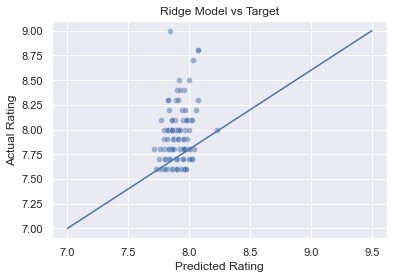

In [93]:
sns.scatterplot(x=test_set_pred, y=y_test, alpha=.5)
plt.plot(np.linspace(7,9.5),np.linspace(7,9))
plt.title('Ridge Model vs Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

In retrospect (and sort of spurred by this graph)- might've been a bit of a better idea to use more 'random' sets of 
movies instead of JUST the top 100

Anyways- can definitely see we're undershooting the data here, potentially in part due to the distribution of the ratings in general (much more in the 7.x range than 8.x, 9.x)


In [88]:
r2_score(y_test,test_set_pred)

0.04904285617259796

In [89]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 
mae(y_test,test_set_pred)

0.22086348721534482

In [96]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y_test,test_set_pred)

8.216269722668759

In contrast, the MAE is actually not that bad, all things considered. With that said, is that all that surprising given the natural bias in our target variable? At the end of the day there is a small range of known values to the model, it really just needs to shoot within that range. Might be that's why the R2 is so bad.

Let's see if we can graph the residuals real quick.

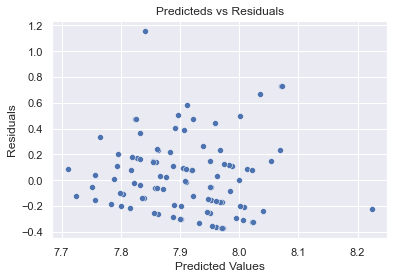

In [95]:
residuals = y_test - test_set_pred
sns.scatterplot(x=test_set_pred,y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicteds vs Residuals');

Very interesting skew here. Noted.

In [97]:
lm_reg.coef_

array([ 0.0497221 ,  0.0040575 ,  0.07336813, -0.02792309, -0.00871196,
        0.02872125,  0.01857662,  0.05146882, -0.00642161,  0.01444377,
        0.04106945, -0.03811075, -0.01365037, -0.02698088,  0.00522933,
        0.0107666 , -0.04195833, -0.02547109,  0.01271871, -0.01326944,
       -0.01234974, -0.00271408, -0.01974796, -0.00411923,  0.00842356,
        0.01037162, -0.00169434,  0.01334057, -0.01991871])

In [98]:
coef_zip = list(zip(X.columns.tolist(),lm_reg.coef_))
sortedCoefs = sorted(coef_zip, key = lambda x: abs(x[1]))
sortedCoefs[:-11:-1]
#snagging top 10 coefficients
#works okay because recall standardized at this point
#next up try and do a bar graph of some sort

[('Years Since Release', 0.0733681276901297),
 ('R', 0.051468816579552275),
 ('Runtime', 0.049722099486282464),
 ('Thriller', -0.04195832870656086),
 ('Animation', 0.04106944634813832),
 ('Comedy', -0.03811074906780483),
 ('PG', 0.02872124694025407),
 ('M', -0.027923088493416782),
 ('Family', -0.02698088056510077),
 ('Romance', -0.02547108557923221)]

In [100]:
barNames = [i[0].title() for i in sortedCoefs[:-11:-1]]
plotCoefs = [i[1] for i in sortedCoefs[:-11:-1]]

In [101]:
barNames

['Years Since Release',
 'R',
 'Runtime',
 'Thriller',
 'Animation',
 'Comedy',
 'Pg',
 'M',
 'Family',
 'Romance']

In [102]:
plotCoefs

[0.0733681276901297,
 0.051468816579552275,
 0.049722099486282464,
 -0.04195832870656086,
 0.04106944634813832,
 -0.03811074906780483,
 0.02872124694025407,
 -0.027923088493416782,
 -0.02698088056510077,
 -0.02547108557923221]

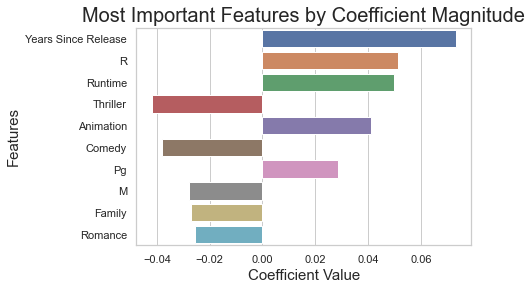

In [108]:
sns.set_theme(style = 'whitegrid')
coefPlot = sns.barplot(y=barNames,x=plotCoefs, orient = 'h')
coefPlot.set_title("Most Important Features by Coefficient Magnitude", fontsize = 20)
coefPlot.set_xlabel('Coefficient Value', fontsize = 15)
coefPlot.set_ylabel('Features', fontsize = 15)
plt.show();

Also including here, for reference, the code used to tune Lasso's lambda. This was taken from a different, messier notebook so I'm including the code and the output (as a comment)

In [ ]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('Lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)
    
    val_set_pred = pipe.predict(X_val.values)
    err_vec_val[i] = mae(y_val, val_set_pred)

In [ ]:
np.min(err_vec_val)
#output: 0.23998252001772713

In [ ]:
lasso_model = Lasso(alpha = 0.02300430119772918)
lasso_model.fit(X_train, y_train)
lasso_model.coef_
# array([ 1.88035955e-03, -2.49446462e-04, -9.05041522e-12, -0.00000000e+00,
#        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
#        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
#        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
#         0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
#        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
#        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
#        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
#         0.00000000e+00,  0.00000000e+00,  0.00000000e+00])


I chose against Lasso because it pretty much zeroed everything out- and I didn't think that would make a particularly interesting model! Plus- ridge ended up giving me a better MAE anyways :)